In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json
trips = pd.read_csv('/Users/Guoyuqi1/Desktop/new.csv', parse_dates=['starttime','stoptime'],infer_datetime_format=True)
trips.head()

In [19]:
ind=pd.DatetimeIndex(trips["starttime"])#extract start time

In [20]:
trips['date']=ind.date.astype('datetime64')# convert format

In [21]:
trips['hour']=ind.hour# extract hour

In [23]:
by_date=trips.pivot_table('tripduration',aggfunc='count',index='date',columns='usertype')# count the number of trip by date

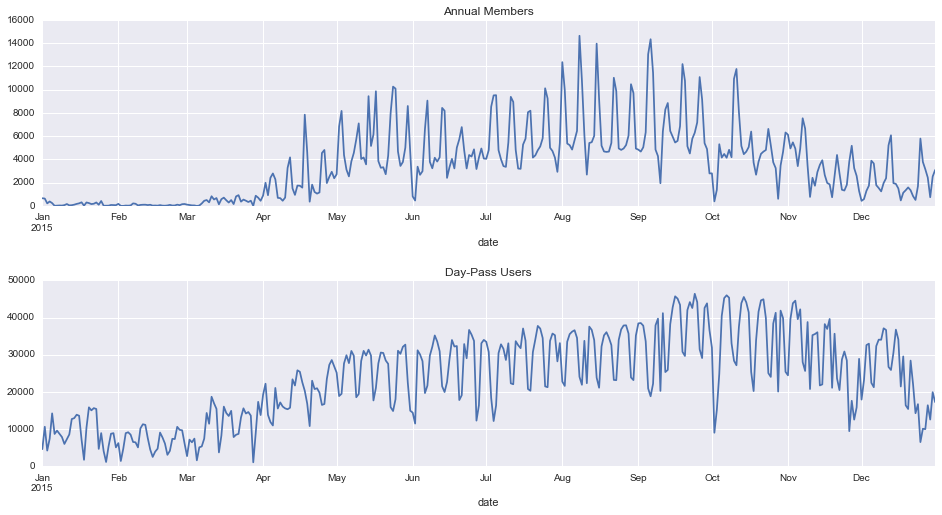

In [137]:
fig, ax = plt.subplots(2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:, 0].plot(ax=ax[0], title='Annual Members');
by_date.iloc[:, 1].plot(ax=ax[1], title='Day-Pass Users');

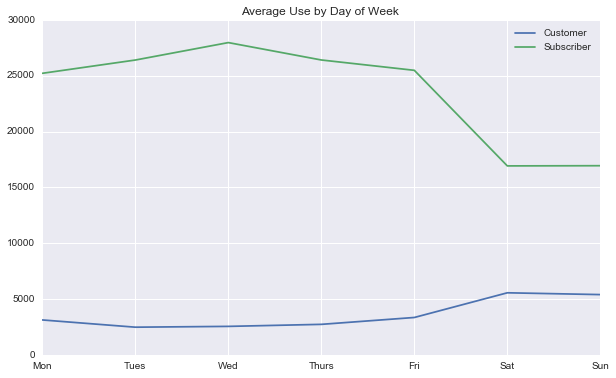

In [132]:
by_weekday = by_date.groupby([by_date.index.year,
                              by_date.index.dayofweek]).mean()
by_weekday.columns.name = None  # remove label for plot

fig, ax = plt.subplots(figsize=(10, 6), sharey=True)

by_weekday.loc[2015].plot(title='Average Use by Day of Week ',ax=ax);

ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


In [32]:
# count trips by date and by hour
by_hour = trips.pivot_table('tripduration', aggfunc='count',
                            index=['date', 'hour'],
                            columns='usertype').fillna(0).reset_index('hour')

# average these counts by weekend
by_hour['weekend'] = (by_hour.index.dayofweek >= 5)
by_hour = by_hour.groupby(['weekend', 'hour']).mean()
by_hour.index.set_levels([['weekday', 'weekend'],
                          ["{0}:00".format(i) for i in range(24)]],
                         inplace=True);
by_hour.columns.name = None


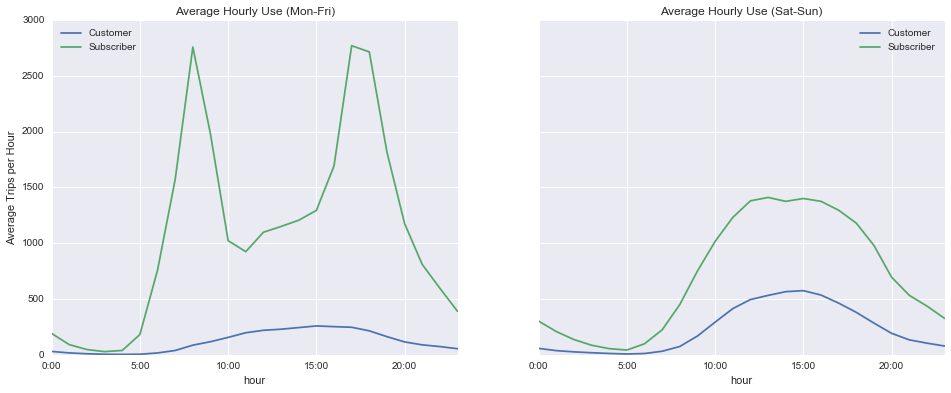

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_hour.loc['weekday'].plot(title='Average Hourly Use (Mon-Fri)', ax=ax[0])
by_hour.loc['weekend'].plot(title='Average Hourly Use (Sat-Sun)', ax=ax[1])
ax[0].set_ylabel('Average Trips per Hour');


In [63]:
stations = pd.read_csv('/Users/YuqiGuo/Desktop/2015_station_data.csv')
stations.head()

,id,stationName,availableDocks,totalDocks,latitude,longitude,statusValue,statusKey,availableBikes,stAddress1,Unnamed: 10,testStation,lastCommunicationTime,landMark
0,72,W 52 St & 11 Ave,37,39,40.767272,-73.993929,In Service,1,0,W 52 St & 11 Ave,NaN,False,4/26/16 10:29,NaN
1,79,Franklin St & W Broadway,17,33,40.719116,-74.006667,In Service,1,13,Franklin St & W Broadway,NaN,False,4/26/16 10:29,NaN
2,82,St James Pl & Pearl St,25,27,40.711174,-74.000165,In Service,1,1,St James Pl & Pearl St,NaN,False,4/26/16 10:29,NaN
3,83,Atlantic Ave & Fort Greene Pl,35,62,40.683826,-73.976323,In Service,1,26,Atlantic Ave & Fort Greene Pl,NaN,False,4/26/16 10:28,NaN
4,116,W 17 St & 8 Ave,16,39,40.741776,-74.001497,In Service,1,21,W 17 St & 8 Ave,NaN,False,4/26/16 10:31,NaN


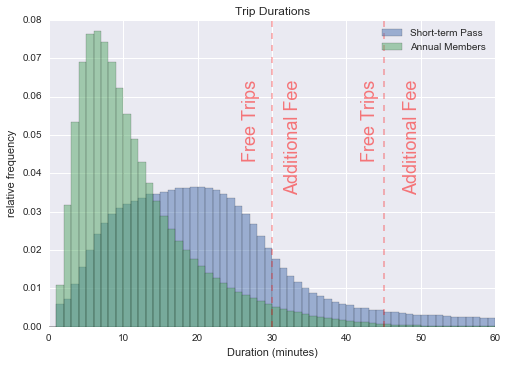

In [4]:
trips['minutes'] = trips.tripduration / 60
trips.groupby('usertype')['minutes'].hist(bins=np.arange(61), alpha=0.5, normed=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip Durations')
plt.text(34, 0.05, "Free Trips\n\nAdditional Fee", ha='right',
         size=18, rotation=90, alpha=0.5, color='red')
plt.legend(['Short-term Pass','Annual Members'])

plt.axvline(30, linestyle='--', color='red', alpha=0.3);
plt.axvline(45, linestyle='--', color='red', alpha=0.3);
plt.text(50, 0.05, "Free Trips\n\nAdditional Fee", ha='right',
         size=18, rotation=90, alpha=0.5, color='red')